#### READ ME
To play go to the bottom of the notebook and run all the coding blocks above. Then run the last block.

The user plays as car number 1.

Give the number of the car you want to move

a matrix that shows the numbers of the cars in their initial setup is printed above the plot

GUI is SUB optimal, since this was a side project trying a different approach

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [5]:
class rush_hour:
    
    def __init__(self, setup = 1, mode = "full_slides_only", ai_car = 2, human_car = 1):
        
        table_size = (6,14)
        
        ##initilaze table
        self.table = np.zeros(table_size)
        
        self.ai_car = ai_car
        self.human_car = human_car
        self.mode = mode 
        
        if setup == 1:
            ## placing players
            self.place_car(1, self.table, ((1,1),(0,1)) )
            self.place_car(2, self.table, ((4,4),(12,13)) )

            ## place obstacle car
            self.place_car(3, self.table, ((5,4,3),(3,3,3)) )
            self.place_car(4, self.table, ((0,1,2),(10,10,10)) )

            #self.place_car(((4,10),(5,10)),5)
            #self.place_car(((0,3),(1,3)),6)

            self.ai_win_pos = ((4,4),(0,1))
            self.human_win_pos = ((1,1),(12,13))
            
        elif setup == 2:
            
            ### shift only
            ## placing players
            self.place_car(1, self.table, ((1,1),(0,1)) )
            self.place_car(2, self.table, ((4,4),(12,13)) )

            ## place obstacle car
            self.place_car(3, self.table, ((1,1,1),(11,12,13)) )
            self.place_car(4, self.table, ((4,4,4),(0,1,2)) )

            self.place_car(5, self.table, ((0,1),(4,4)) )
            self.place_car(6, self.table, ((4,5),(9,9)) )
            
            self.place_car(7, self.table, ((1,2),(5,5)) )
            self.place_car(8, self.table, ((3,4),(8,8)) )
            
            self.place_car(9, self.table, ((2,3),(6,6)) )
            self.place_car(10, self.table, ((2,3),(7,7)) )
            #self.place_car(((0,3),(1,3)),6)

            self.ai_win_pos = ((4,4),(0,1))
            self.human_win_pos = ((1,1),(12,13))
            
        elif setup == 3:
            
            ## placing players
            self.place_car(1, self.table, ((2,2),(0,1)) )
            self.place_car(2, self.table, ((3,3),(12,13)) )
            
            self.place_car(3, self.table, ((1,2,3),(2,2,2)) )
            self.place_car(4, self.table, ((2,3,4),(11,11,11)) )
            
            self.place_car(5, self.table, ((0,1),(3,3,3)) )
            self.place_car(6, self.table, ((4,5),(10,10,10)) )
            
            self.place_car(7, self.table, ((2,3),(5,5,5)) )
            self.place_car(8, self.table, ((2,3),(8,8,8)) )
            
            self.place_car(9, self.table, ((0,0),(6,7)) )
            self.place_car(10, self.table, ((5,5),(6,7)) )

            self.ai_win_pos = ((3,3),(0,1))
            self.human_win_pos = ((2,2),(12,13))
        
    class node:
        
        def __init__(self, parent=None, state = None, car = None):
            
            self.parent = parent
            self.state = state
            self.car = car

            self.g = 0
            self.h = 0
            self.f = 0

        def __eq__(self, other):
            return self.position == other.position
        
                
    def place_car(self, car, board, position):
        '''places cars of input'''
        for i in range(len(position[0])):
            
            board[position[0][i],position[1][i]] = car
            
        return board
            
    
    def update_position(self, car, board, new_position, copy = True):
        
        if copy == True:
            board = board.copy()
            
        board[board == car] = 0
        board = self.place_car(car, board, new_position)
        
        return board
    
    def get_position(self, car, board):
        
        position = np.where(board == car)
        
        return position
    
    def ai_turn(self, card = None): 
        
        board = self.table
        depth = 3
        car = self.ai_car
        score, best_state = self.minimax(car, board, depth, self.human_car, card)
        
        position = self.get_position(best_state[1], best_state[0])
        self.update_position(best_state[1], self.table, position, copy = False)
        
    def make_move(self, car, board, move, card = None):
        
        '''slides car num_moves along its moveable direction'''
        ''' num_moves is negative car will move along its -x or -y direction '''
        '''if move is not legal, board will not update'''
        
        legal_moves = self.get_moves(car, board, card)
        position = self.get_position(car, board)
            
        if move in legal_moves:
            
            new_position = self.get_new_position(car, board, position, move)
            board = self.update_position(car, board, new_position, copy = False)
        else:
            print('move not legal, possible moves are:',legal_moves)
            
        return board
        
    
    def get_direction(self, car, board, position):
        
        '''returns direction and idx of row or column that car moves along'''
        
        if position[0][0] == position[0][1]:
            direction = 'horizontal'
            idx = position[0][0]
        else:
            direction = 'vertical'
            idx = position[1][0]
        
        return direction, idx
    
    def get_new_position(self, car, board, position, places):
        
        direction, idx = self.get_direction(car, board, position)
        
        if direction == 'horizontal':
            prev_pos = (position[0],position[1])
            new_position = (position[0],position[1] + (places))
        else:
            prev_pos = (position[0],position[1])
            new_position = (position[0] - (places),position[1])
        
        return new_position
    
    def get_moves(self, car, board, card = None, return_direction = False):
        
        position = self.get_position(car, board)
        direction, idx = self.get_direction(car, board, position)
        
        if self.mode == "full_slides_only":
            max_moves = max(board.shape)
        elif self.mode == "cards":
            try:
                card = int(card)
                max_moves = card
            except:
                if card == "slide":
                    max_moves = max(board.shape)
            
        legal_moves = []
        
        ### finding possibe moves
        ## horizontal
        if direction == 'horizontal':
            
            ## row that car moves along
            row = idx
            
            ## car column placements
            col_min = position[1][0]
            col_max = position[1][-1]
            
            left_places = 0
            right_places = 0
            
            ## counting available spots
            #left
            for left_place in reversed(board[row,:col_min]):
                if left_place == 0:
                    if abs(left_places) < max_moves:
                        left_places = left_places -1
                        legal_moves.append(left_places)
                    else:
                        break
                else:
                    break
                    
            #right        
            for right_place in board[row,col_max+1:]:
                if right_place == 0:
                    
                    if abs(right_places) < max_moves:
                        right_places = right_places +1
                        legal_moves.append(right_places)
                    else:
                        break
                else:
                    break
                
          
        ## vertical
        else:
            
            ## col that car moves along
            col = idx
            
            ## car column placements
            row_min = position[0][0]
            row_max = position[0][-1]
            
            down_places = 0
            up_places = 0
            
            ## counting available spots
            #down
            for down_place in board[row_max+1:,col]:
                if down_place == 0:
                    if abs(down_places) < max_moves:
                        down_places = down_places -1
                        legal_moves.append(down_places)
                    else:
                        break
                else:
                    break
            #up
            for up_place in reversed(board[:row_min,col]):
                if up_place == 0:
                    if abs(up_places) < max_moves:
                        up_places = up_places +1
                        legal_moves.append(up_places)
                    else:
                        break
                else:
                    break
        
        if self.mode == "full_slides_only":
            if len(legal_moves) == 0:
                if return_direction == False:
                    return legal_moves
                else:
                    return (legal_moves, direction)
                
            else:
                #print(legal_moves)
                if (min(legal_moves) < 0 and max(legal_moves)>0):
                    legal_moves = [min(legal_moves), max(legal_moves)]
                elif min(legal_moves) > 0:
                    legal_moves = [max(legal_moves)]
                elif max(legal_moves) < 0:
                    legal_moves = [min(legal_moves)]
                    
        
        if return_direction == False:
            return legal_moves
        else:
            return (legal_moves, direction)
    
    
    def get_heuristic(self, board, heuristic = 'blockcount'):
        
        '''get heurstic score for ai'''
        '''needs adjust if to be robust for vertical play'''
        cars = [self.human_car, self.ai_car]
        score = 0
        #print(board)
        for car in cars:
            
            position = self.get_position(car, board)
        
            if car == 2: 
                pos = min(position[1])
                col_start = 0
                col_end = pos

            elif car == 1:
                pos = max(position[1]) +1
                col_start = pos
                col_end = board.shape[1]
                
            #print("car:", car, "pos:", pos, "col_start", col_start, "col_end", col_end)

            ### counts how many "blocks till victory"
            if heuristic == 'blockcount':

                direction, idx = self.get_direction(car, board, position)

                if direction == 'horizontal':
                    mask = np.isin(np.unique(board[idx][col_start:col_end]), [0,car],invert =True)
                    moveable_cars = np.unique(board[idx][col_start:col_end])[mask]
                    #print(mask)
                    #print(board[idx][col_start:col_end])
                    #print(col_start,col_end)
                    #print(car, moveable_cars)

                else:
                    ## not really used unless players play vertically.. 
                    mask = np.isin(np.unique(board[:,idx]), [0,car],invert =True)                      
                    moveable_cars = np.unique(board[:,idx])[mask]
                    
                if car == 1:
                    dist = col_end - pos
                    score = score + len(moveable_cars) + dist + 1
                    if pos == col_end:
                        score = score + 1
                elif car == 2:
                    dist = pos 
                    score = score - len(moveable_cars) - dist - 1
                    if pos == col_start:
                        score = score -1
                        
            
            elif heuristic == 'advanced_blockcount':
                print("count how many blocks in total, (blocks of blocks included)")
                
            elif heuristic == 'astar':
                
                for car in cars:
                    
                    position = self.get_position(car, board)
        
                    if car == 1: ## left side is winning side
                        pos = min(position[1])
                        col_start = 0
                        col_end = pos

                    elif car == 2:
                        pos = max(position[1])
                        cols = pos, board.shape[1] -1
                        col_start = pos
                        col_end = board.shape[1] -1
                    
                    if car == 1:
                        path = astar(board, start, end)
                
            
        #print(score)
        #print("")
        return score    
            
    def game_over(self, board):
        
        ai_pos = self.get_position(self.ai_car, board)
        human_pos = self.get_position(self.human_car, board)
        
        if all(ai_pos[0] == self.ai_win_pos[0]) and all(ai_pos[1] == self.ai_win_pos[1]):
            return True
        
        elif all(human_pos[0] == self.human_win_pos[0]) and all(human_pos[1] == self.human_win_pos[1]):
            
            return True
        else:
            return False
        
    def minimax(self, car, board, depth, opponent_car, card = None, maximize = True):
        
        static_components = [0, opponent_car]
        
        if depth == 0 or self.game_over(board) == True:
            static_eval = self.get_heuristic(board)
            return static_eval
        
            
        mask = np.isin(np.unique(board), static_components ,invert =True)
        moveable_cars = np.unique(board)[mask]
        
        current_state = board
        children = []
        
        for moveables in moveable_cars:
            
            moveables_position = self.get_position(moveables, board)
            
            moves = self.get_moves(moveables, board, card = card)
                    
            for move in moves:

                #new moveables psoiton
                new_position = self.get_new_position(moveables, current_state, moveables_position, move)
                
                # Get node position
                new_state = self.update_position(moveables, current_state, new_position)

                # Create new node
                new_node = self.node(current_state, new_state, moveables)

                # Append
                children.append(new_node)
                          
        scores = []
        
        if maximize == False:
            
            min_eval = 100
            
            for child in children:
                
                score = self.minimax(opponent_car, child.state, depth - 1, car, card, maximize = True)
                
                if type(score) is int:
                    if score < min_eval:
                        best_move = (child.state, child.car)
                        min_eval = min(score, min_eval)
                elif type(score) == np.int64:
                    if score < min_eval:
                        best_move = (child.state, child.car)
                        min_eval = min(score, min_eval)
                else:
                    if score[0] < min_eval:
                        best_move = (child.state, child.car)
                        min_eval = min(score[0], min_eval)
                        

            return (min_eval, best_move)
        
        if maximize == True:
            
            max_eval = -100
            for child in children:
                
                score = self.minimax(opponent_car, child.state, depth - 1, car, card, maximize = False)
                
                if type(score) is int:
                    if score > max_eval:
                        best_move = (child.state, child.car)
                        max_eval = max(score, max_eval)
                elif type(score) == np.int64:
                    #print(score)
                    if score > max_eval:
                        best_move = (child.state, child.car)
                        max_eval = max(score, max_eval)
                else:
                    if score[0] > max_eval:
                        best_move = (child.state, child.car)
                        max_eval = max(score[0], max_eval)
                    
                #print(child.state)
            return (max_eval, best_move)
        
    def human_turn(self, card = None):
        
        car = input("Enter number of the car to move")
        car = int(car)
        print(type(card))
        print(card)
        legal_moves, direction = self.get_moves(car, self.table, card, return_direction = True)

        print("Car", car, "moves", direction, "and has option:")
        print(legal_moves)

        move = int(input("Enter move"))
        valid = False
        
        while valid == False:
            if move in legal_moves:
                valid = True
                self.make_move(car, self.table, move, card)
                
            else:
                move = int(input("not valid move, try again"))
                
    def astar(maze, start, end):
        """Returns a list of tuples as a path from the given start to the given end in the given maze"""

        # Create start and end node
        start_node = Node(None, start)
        start_node.g = start_node.h = start_node.f = 0
        end_node = Node(None, end)
        end_node.g = end_node.h = end_node.f = 0

        # Initialize both open and closed list
        open_list = []
        closed_list = []

        # Add the start node
        open_list.append(start_node)

        # Loop until you find the end
        while len(open_list) > 0:

            # Get the current node
            current_node = open_list[0]
            current_index = 0

            for index, item in enumerate(open_list):
                if item.f < current_node.f:
                    current_node = item
                    current_index = index

            # Pop current off open list, add to closed list
            open_list.pop(current_index)
            closed_list.append(current_node)

            # Found the goal
            if current_node == end_node:
                path = []
                current = current_node
                while current is not None:
                    path.append(current.position)
                    current = current.parent
                return path[::-1] # Return reversed path

            # Generate children
            children = []
            for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

                # Get node position
                node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

                # Make sure within range
                if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                    continue

                # Make sure walkable terrain
                if maze[node_position[0]][node_position[1]] != 0:
                    continue

                # Create new node
                new_node = Node(current_node, node_position)

                # Append
                children.append(new_node)

            # Loop through children
            for child in children:

                # Child is on the closed list
                for closed_child in closed_list:
                    if child == closed_child:
                        continue

                # Create the f, g, and h values
                child.g = current_node.g + 1
                child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
                child.f = child.g + child.h

                # Child is already in the open list
                for open_node in open_list:
                    if child == open_node and child.g > open_node.g:
                        continue

                # Add the child to the open list
                open_list.append(child)
        
        
    def show_table(self):
        
        from IPython.display import clear_output
        import cv2
        
        factor = 50
        
        #size of the new image
        height = self.table.shape[0] * factor
        width = self.table.shape[1] * factor
        
        img = self.table
        img = cv2.resize(img, (width, height), interpolation= cv2.INTER_AREA)
        
        for i in range(self.table.shape[0]):
            img[i*factor,:] = 1
            
        for i in range(self.table.shape[1]):
            img[:,i*factor] = 1
            
        
        plt.figure()
        plt.imshow(img)
        plt.show()
        clear_output(wait=True)
        
    

[[ 0.  0.  0.  5.  0.  0.  9.  9.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  0.  0.  7.  0.  0.  8.  0.  0.  4.  0.  0.]
 [ 0.  0.  3.  0.  0.  7.  0.  0.  8.  0.  0.  4.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10. 10.  0.  0.  6.  0.  0.  0.]]


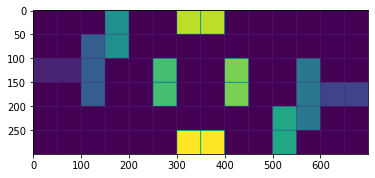

In [6]:
### game setup
game = rush_hour(setup = 3, mode = "full_slides_only")
print(game.table)
game.show_table()

In [8]:
### game play
turn = 0
game_over = 0
while not game_over:
    if turn == 0:
        game.human_turn(4)
        turn = 1
        game_over = game.game_over(game.table)
        print(game.table)
        game.show_table()
        continue
    else:
        time.sleep(5)
        game.ai_turn(4)
        game_over = game.game_over(game.table)
        print(game.table)
        game.show_table()
        turn = 0
        
    if game_over == True:
        print("game over")
game.show_table()
    
    

ValueError: invalid literal for int() with base 10: ''